# NR 20MHz 256QAM Test Signal
Implementation of NR20M_UDC1_30_256QAM test model


In [1]:
import pyPhyNR as pynr
from pyPhyNR.core.signal_builder import NRSignalBuilder


In [2]:
# Create signal builder for 20MHz, numerology 1 (30kHz SCS)
signal = NRSignalBuilder(bandwidth_mhz=20, numerology=1, cell_id=1)

# Configure carrier
signal.configure_carrier(
    sample_rate=23.04e6,  # Standard sample rate for 20MHz
    fft_size=768  # Appropriate FFT size for 20MHz
).initialize_grid()

# Print carrier configuration
print("Carrier Configuration:")
print(signal.get_carrier_config())


Carrier Configuration:
{'bandwidth_mhz': 20, 'numerology': 1, 'sample_rate': 23040000.0, 'fft_size': 768, 'num_rb': 51, 'cp_type': 'normal'}


In [3]:
# 1. SSB configuration:
# Pattern C, period=10 means SSB appears in slots 0,10
signal.add_ssb(
    start_rb=15,  # rbOffset in NR5G.cs
    start_symbol=2,  # Pattern C SSB position (symbols 2-5)
    slot_pattern=[0, 10],  # SSB in slots 0 and 10
    power=0.0
)

# 2. PDSCH allocations in slot 0 (working around SSB in symbols 2-5):
signal.add_pdsch(
    start_rb=0,
    num_rb=51,  # Full bandwidth
    start_symbol=0,
    num_symbols=2,  # Use symbols 0-1 (before SSB)
    slot_pattern=[0],  # Slot 0
    modulation="QAM256",
    dmrs_type="B",
    dmrs_add_pos=0,
    power=0.0
)

signal.add_pdsch(
    start_rb=0,
    num_rb=51,
    start_symbol=6,
    num_symbols=4,  # Use symbols 6-9 (after SSB)
    slot_pattern=[0],  # Slot 0
    modulation="QAM256",
    dmrs_type="B",
    dmrs_add_pos=0,
    power=0.0
)

signal.add_pdsch(
    start_rb=0,
    num_rb=51,
    start_symbol=10,
    num_symbols=4,  # Use symbols 10-13 (after SSB)
    slot_pattern=[0],  # Slot 0
    modulation="QAM256",
    dmrs_type="B",
    dmrs_add_pos=0,
    power=0.0
)

# 3. PDSCH allocations for slots 1-19, split around SSB in slot 10:
# Slots 1-9: Full slot allocation
signal.add_pdsch(
    start_rb=0,
    num_rb=51,
    start_symbol=0,
    num_symbols=14,  # Full slot allocation
    slot_pattern=list(range(1, 10)),  # Slots 1-9
    modulation="QAM256",
    dmrs_type="A",  # Default type A
    power=0.0
)

# 4. PDSCH allocations in slot 10 (working around SSB in symbols 2-5):
signal.add_pdsch(
    start_rb=0,
    num_rb=51,
    start_symbol=0,
    num_symbols=2,  # Use symbols 0-1 (before SSB)
    slot_pattern=[10],  # Slot 10
    modulation="QAM256",
    dmrs_type="B",
    dmrs_add_pos=0,
    power=0.0
)

signal.add_pdsch(
    start_rb=0,
    num_rb=51,
    start_symbol=6,
    num_symbols=4,  # Use symbols 6-9 (after SSB)
    slot_pattern=[10],  # Slot 10
    modulation="QAM256",
    dmrs_type="B",
    dmrs_add_pos=0,
    power=0.0
)

signal.add_pdsch(
    start_rb=0,
    num_rb=51,
    start_symbol=10,
    num_symbols=4,  # Use symbols 10-13 (after SSB)
    slot_pattern=[10],  # Slot 10
    modulation="QAM256",
    dmrs_type="B",
    dmrs_add_pos=0,
    power=0.0
)

# 5. Slots 11-19: Full slot allocation
signal.add_pdsch(
    start_rb=0,
    num_rb=51,
    start_symbol=0,
    num_symbols=14,  # Full slot allocation
    slot_pattern=list(range(11, 20)),  # Slots 11-19
    modulation="QAM256",
    dmrs_type="A",  # Default type A
    power=0.0
)


Plotting resource grid...


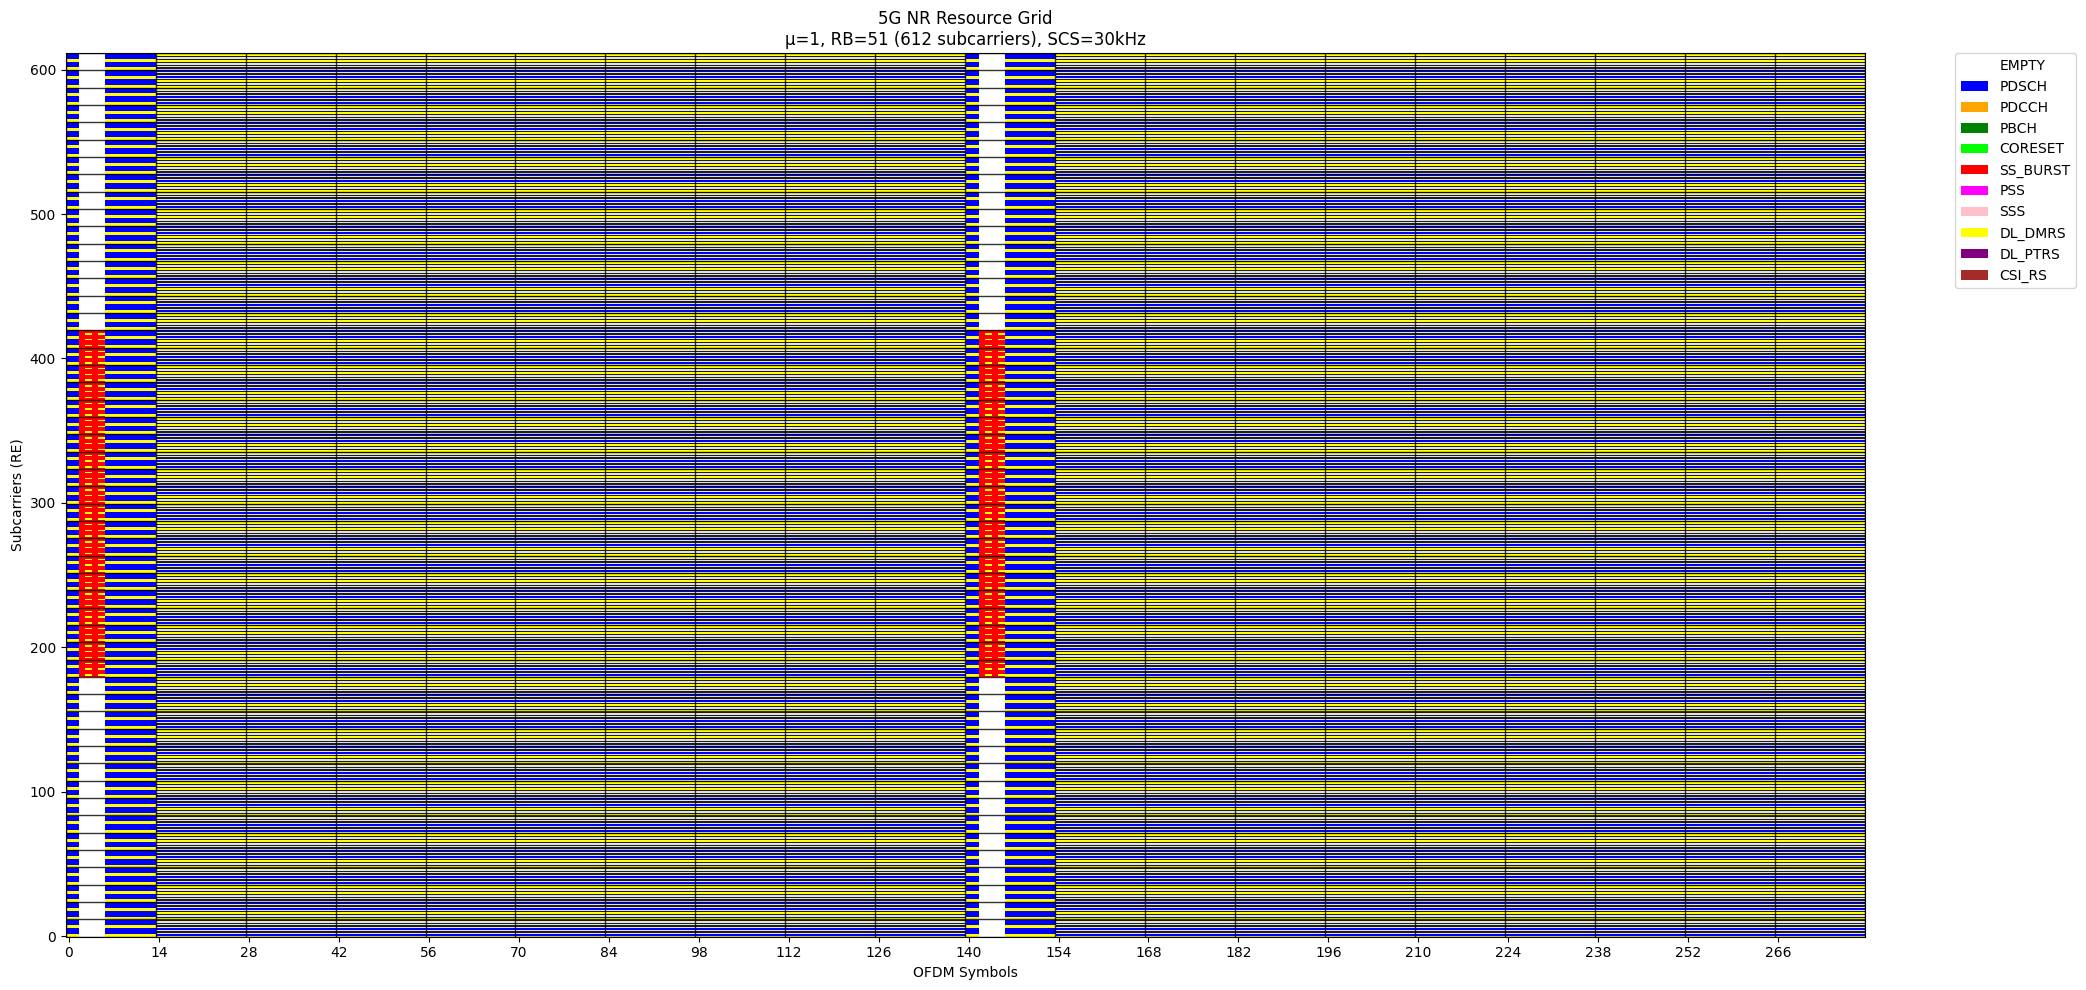

Generating waveform...


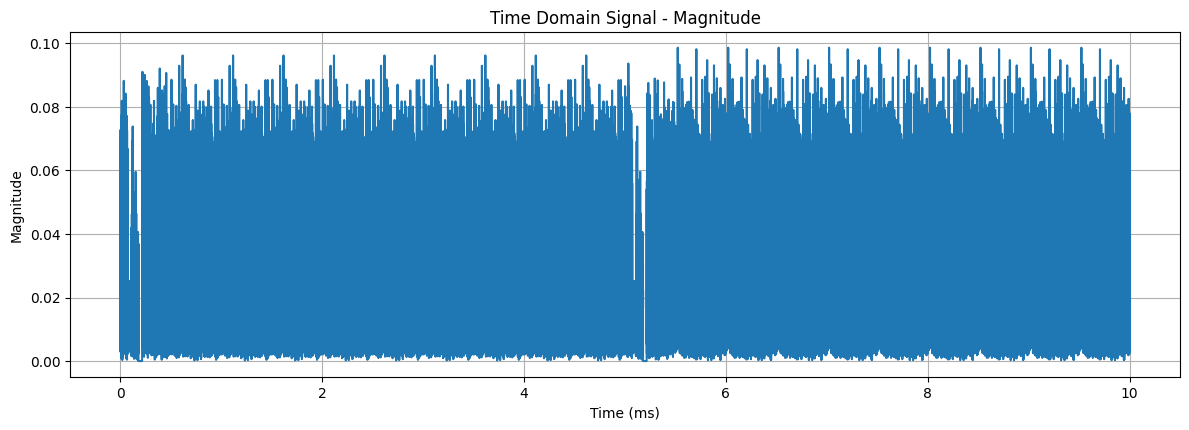

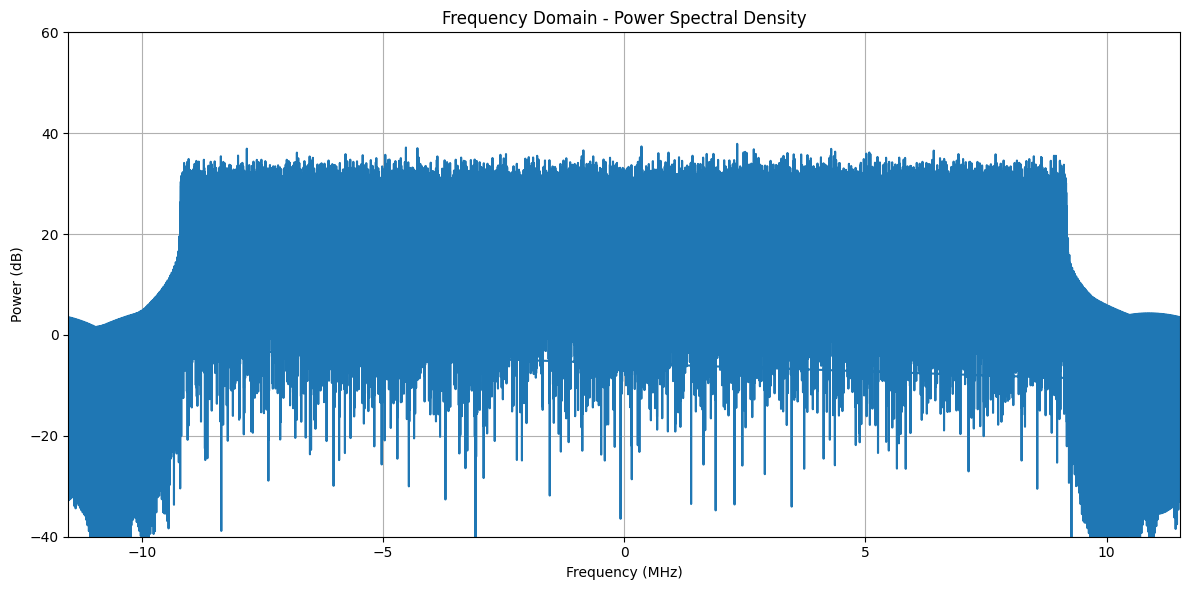

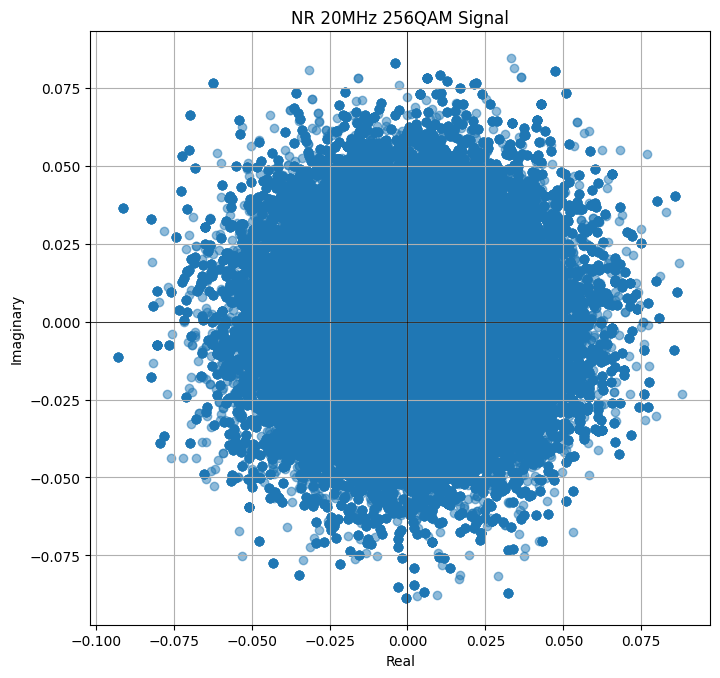

In [4]:
# Visualize resource grid
print("Plotting resource grid...")
pynr.utils.plot_grid_dl(signal.carrier_config, signal.grid)

# Generate waveform
print("Generating waveform...")
iq_samples = signal.generate_signal()

# Plot time and frequency domain
pynr.utils.plot_time_domain(iq_samples, signal.carrier_config)
pynr.utils.plot_frequency_domain(iq_samples, signal.carrier_config)
pynr.utils.plot_constellation(iq_samples, title="NR 20MHz 256QAM Signal")


In [ ]:
# Debug: Check DMRS positions in a PDSCH channel
# Take first PDSCH channel in slot 0
for i in range(grid.n_subcarriers):
    for j in range(14):  # One slot
        re = grid.grid[i, j]
        if re.channel and re.channel.channel_type == ChannelType.PDSCH:
            if re.channel.reference_signal:
                print(f"PDSCH at RE ({i}, {j}):")
                print(f"  RE index within channel: {re.re_idx}")
                print(f"  DMRS positions: {re.channel.reference_signal.positions}")
                print(f"  Is DMRS?: {re.re_idx % 12 in re.channel.reference_signal.positions}")
            break
